# Modelo machine learning - Classificação

**Descrição**
- Modelo machine learning - Anúncios de rede social - Floresta Aleatória

**Contente**
- Inclui idade e salário estimado do usuário. A coluna comprada indica se o usuário específico com idade e salário estimado comprou o produto ou não ao visualizar os anúncios sociais do produto.

**Resultado**
- 0: não
- 1: sim

In [16]:
# Versão do python
from platform import python_version

print('Versão python neste Jupyter Notebook:', python_version())

Versão python neste Jupyter Notebook: 3.8.8


In [17]:
# Importação das bibliotecas 

import pandas as pd # Pandas carregamento csv
import numpy as np # Numpy para carregamento cálculos em arrays multidimensionais

# Visualização de dados
import seaborn as sns
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

# Carregar as versões das bibliotecas
import watermark

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

In [18]:
# Versões das bibliotecas

%reload_ext watermark
%watermark -a "Versões das bibliotecas" --iversions

Author: Versões das bibliotecas

matplotlib: 3.3.4
watermark : 2.3.0
sklearn   : 1.0.2
plotly    : 5.6.0
numpy     : 1.20.1
sys       : 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
pandas    : 1.2.4
seaborn   : 0.11.1



In [19]:
# Configuração para os gráficos largura e layout dos graficos

plt.rcParams["figure.figsize"] = (25, 20)

plt.style.use('fivethirtyeight')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

m.rcParams['axes.labelsize'] = 25
m.rcParams['xtick.labelsize'] = 25
m.rcParams['ytick.labelsize'] = 25
m.rcParams['text.color'] = 'k'

In [20]:
# Carregando a base de dados
df = pd.read_csv("Social_Network_Ads.csv")
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [21]:
# Exibido 5 primeiros dados
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [22]:
# Exibido 5 últimos dados
df.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [23]:
# Número de linhas e colunas
df.shape

(400, 3)

In [24]:
# Verificando informações das variaveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [25]:
# Exibido tipos de dados
df.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [26]:
# Total de colunas e linhas - data_train

print("Números de linhas: {}" .format(df.shape[0]))
print("Números de colunas: {}" .format(df.shape[1]))

Números de linhas: 400
Números de colunas: 3


In [27]:
df.var()

Age                1.098907e+02
EstimatedSalary    1.162603e+09
Purchased          2.302694e-01
dtype: float64

In [28]:
# Exibindo valores ausentes e valores únicos

print("\nMissing values :  ", df.isnull().sum().values.sum())
print("\nUnique values :  \n",df.nunique())


Missing values :   0

Unique values :  
 Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64


In [31]:
# Dados faltantes coluna óbitos

data = df[df["Purchased"].notnull()]
data.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [32]:
# Removendo dados ausentes do dataset 

data = df.dropna()
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [33]:
# Sum() Retorna a soma dos valores sobre o eixo solicitado
# Isna() Detecta valores ausentes

df.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [34]:
# Retorna a soma dos valores sobre o eixo solicitado
# Detecta valores não ausentes para um objeto semelhante a uma matriz.

df.notnull().sum()

Age                400
EstimatedSalary    400
Purchased          400
dtype: int64

In [35]:
# Total de número duplicados

df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [36]:
# Dados faltantes

df.fillna(0, inplace=True)
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [37]:
# Períodos faltantes

sorted(df['Purchased'].unique())

[0, 1]

# **Estatistica Descritiva**

In [39]:
# Exibindo estatísticas descritivas visualizar alguns detalhes estatísticos básicos como percentil, média, padrão, etc. 
# De um quadro de dados ou uma série de valores numéricos.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


# Gráfico de distribuição normal

In [40]:
# Máximo e minimo dados dados
print(df.Age.count())
print(df.Age.max())
print(df.Age.min())

400
60
18


Text(0, 0.5, 'Valor total')

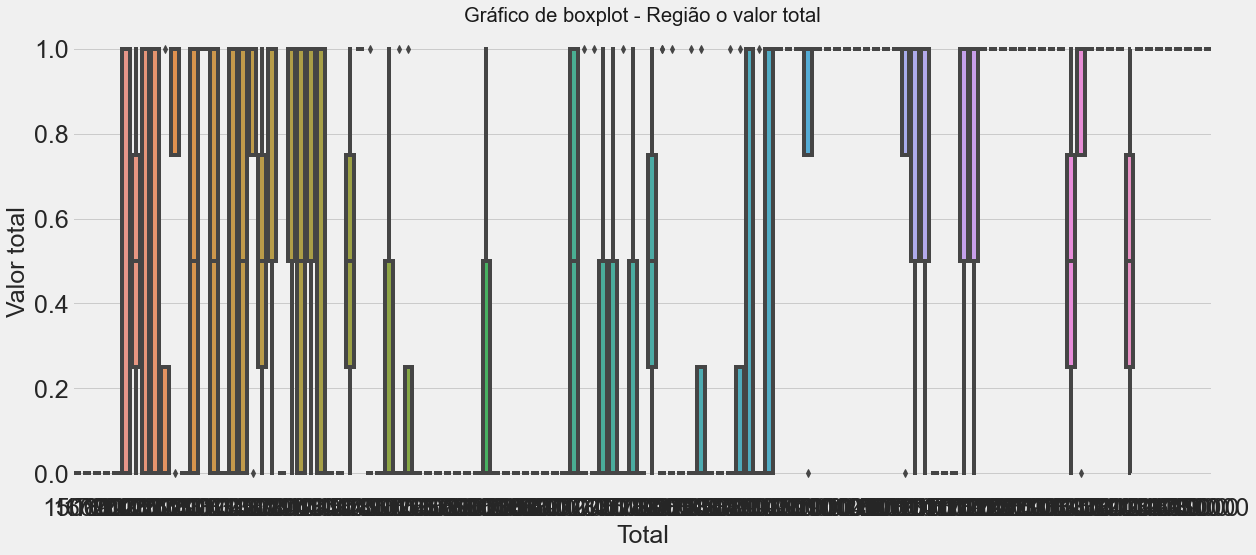

In [44]:
# Verificando os dados no boxplot valor total verificando possíveis outliers

plt.figure(figsize=(18.2, 8))
ax = sns.boxplot(x="EstimatedSalary", y="Purchased", data = df,)
plt.title("Gráfico de boxplot - Região o valor total")
plt.xlabel("Total")
plt.ylabel("Valor total")

In [45]:
# Matriz correlação de pares de colunas, excluindo NA / valores nulos.

corr = df.corr()
corr

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


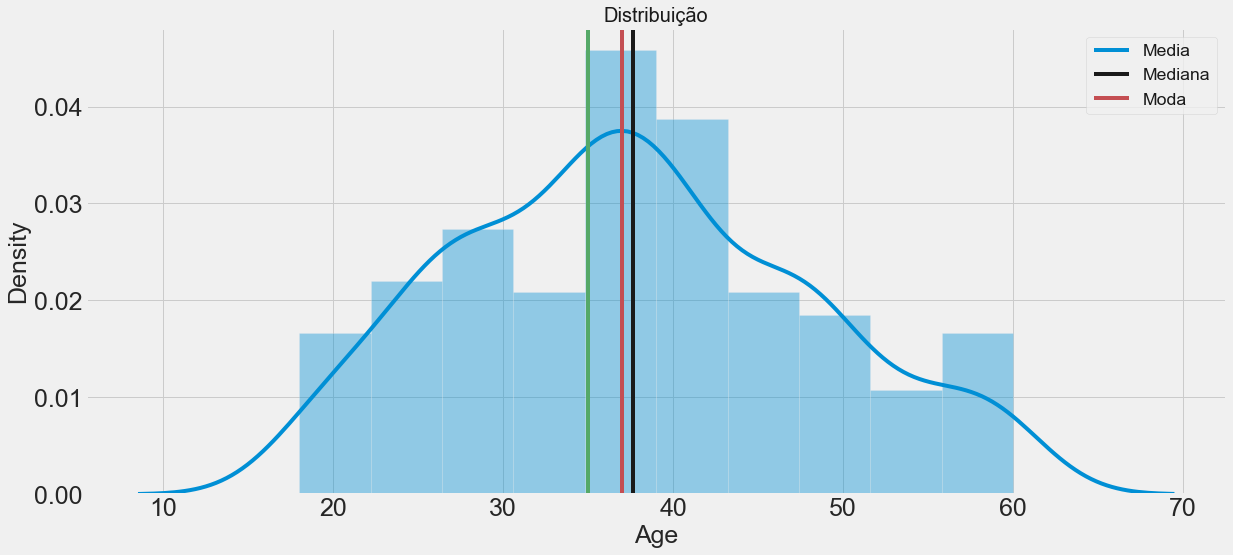

In [42]:
# Gráfico distribuição normal
plt.figure(figsize=(18.2, 8))

ax = sns.distplot(df['Age']);
plt.title("Distribuição", fontsize=20)
plt.axvline(df['Age'].mean(), color='k')
plt.axvline(df['Age'].median(), color='r')
plt.axvline(df['Age'].mode()[0], color='g');
plt.legend(["Media", "Mediana", "Moda"])
plt.show()

Text(0.5, 1.0, 'Matriz de correlação')

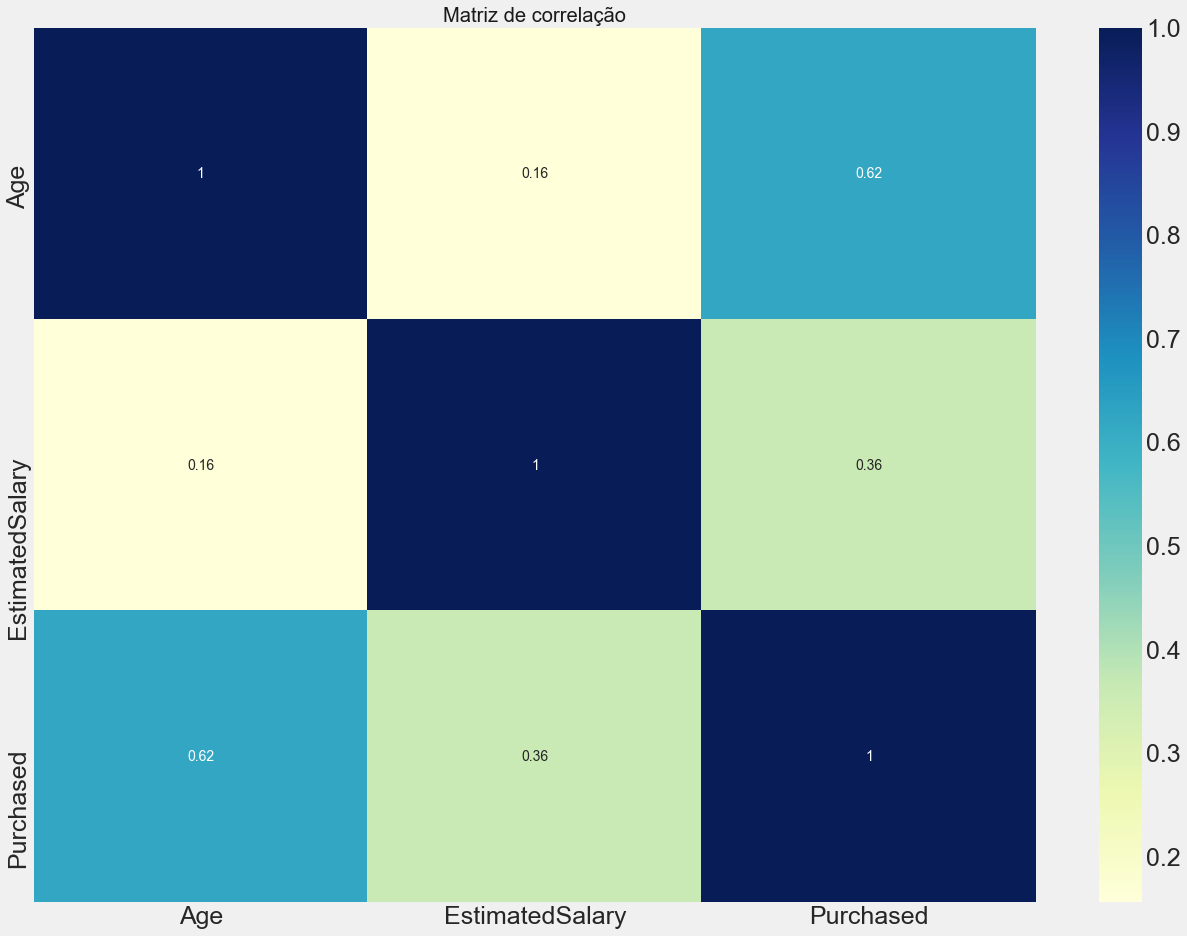

In [47]:
# Gráfico da matriz de correlação

plt.figure(figsize=(20,15))
ax = sns.heatmap(df.corr(), annot=True, cmap='YlGnBu');
plt.title("Matriz de correlação")

# Análise de dados

Text(0, 0.5, 'Total')

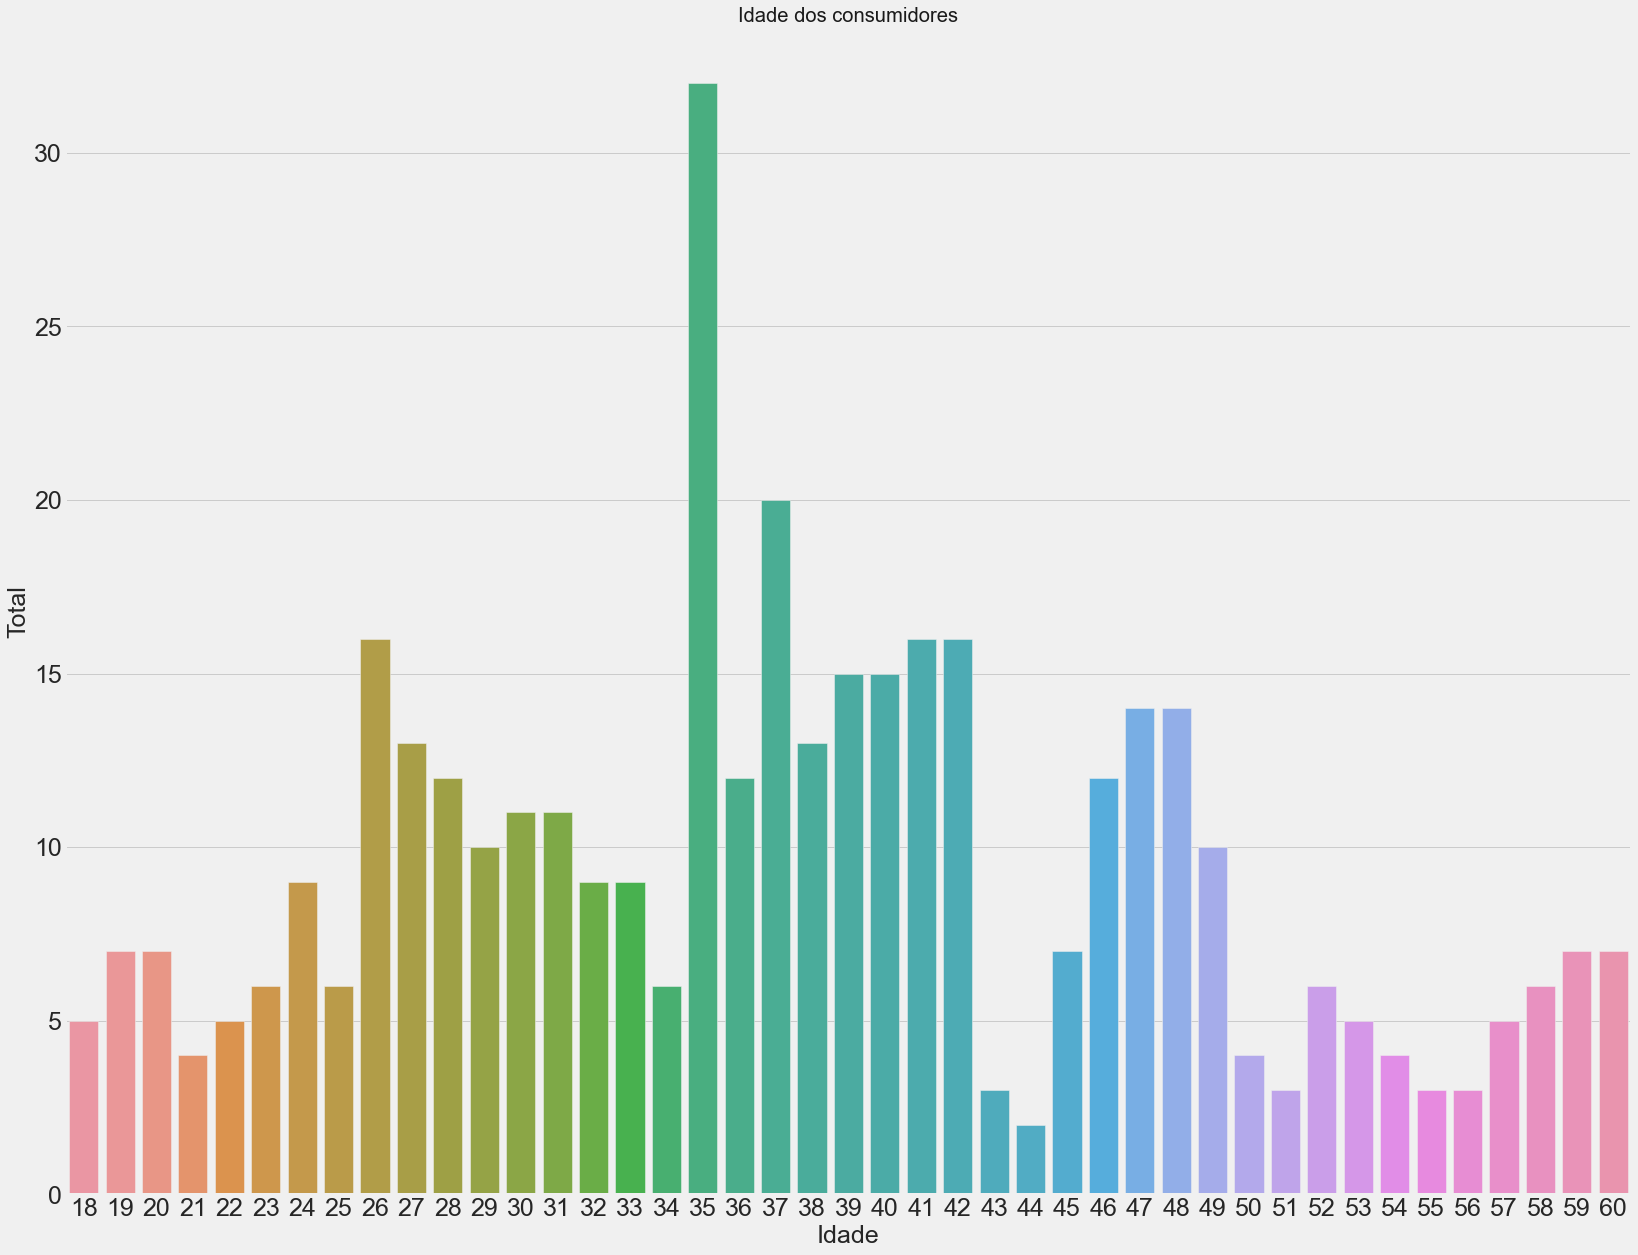

In [54]:
# Gráfico idades dos compadores
ax = sns.countplot(df["Age"])
plt.title("Idade dos consumidores")
plt.xlabel("Idade")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

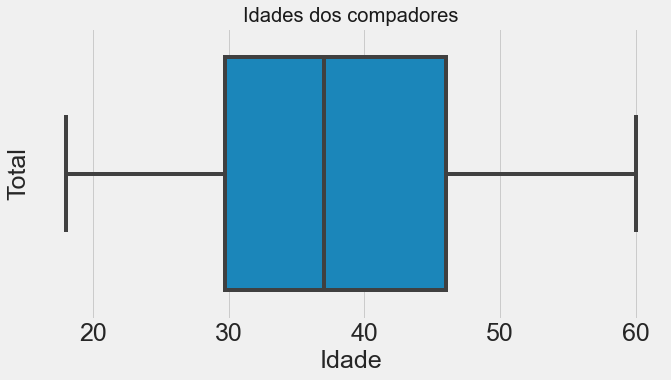

In [50]:
# Gráfico de idade por compadores
plt.figure(figsize=(10, 5))

ax = sns.boxplot(df["Age"])
plt.title("Idades dos compadores")
plt.xlabel("Idade")
plt.ylabel("Total")

<AxesSubplot:xlabel='Age', ylabel='Purchased'>

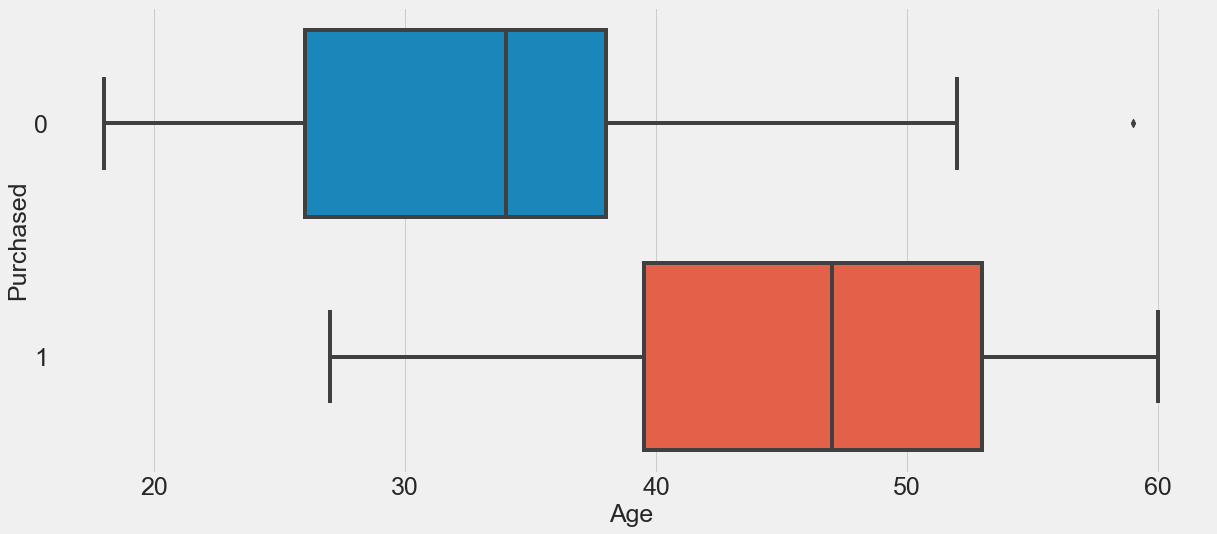

In [51]:
plt.figure(figsize=(18.5, 8))

sns.boxplot(x="Age", y="Purchased", data = df, orient = "h")
plt.title("Idades dos compadores")
plt.xlabel("Idade")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

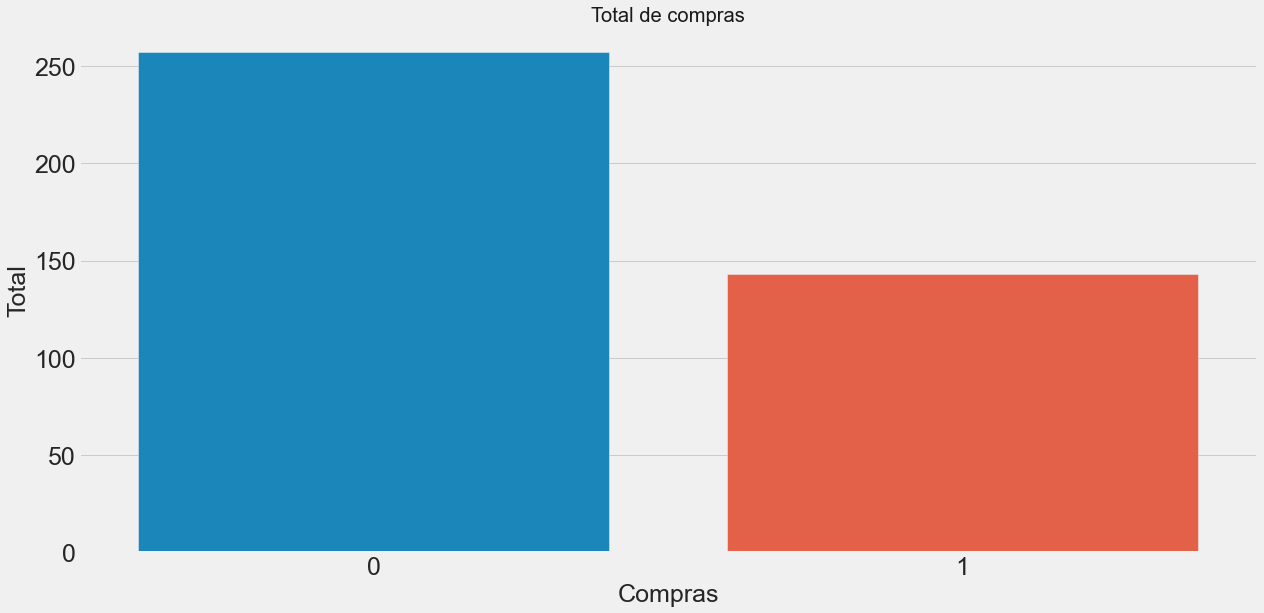

In [56]:
plt.figure(figsize=(18.8, 9))

ax = sns.countplot(df["Purchased"])
plt.title("Total de compras")
plt.xlabel("Compras")
plt.ylabel("Total")

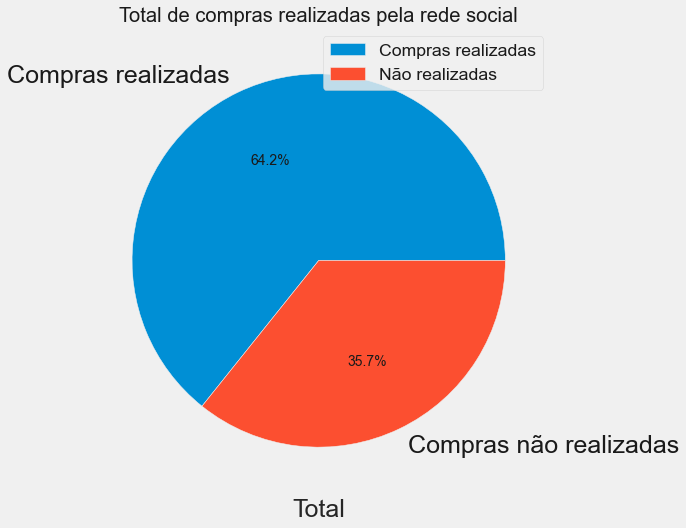

In [59]:
plt.figure(figsize=(15, 8))

plt.pie(df.groupby('Purchased')['Purchased'].count(), labels=['Compras realizadas','Compras não realizadas'], autopct='%1.1f%%');
plt.title("Total de compras realizadas pela rede social")
plt.xlabel("Total")
plt.legend(["Compras realizadas", "Não realizadas"])

Text(0, 0.5, 'Total')

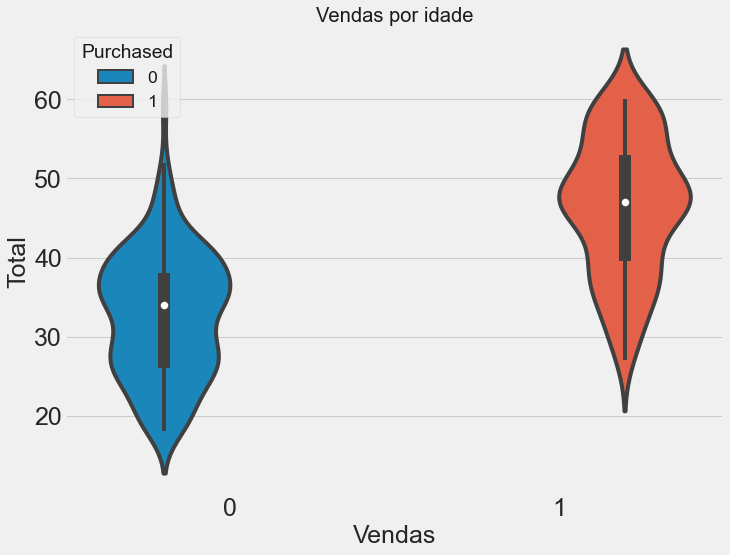

In [63]:
plt.figure(figsize=(10.5, 8))

ax = sns.violinplot(x="Purchased", y="Age", data = df, hue = "Purchased")
plt.title("Vendas por idade")
plt.xlabel("Vendas")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

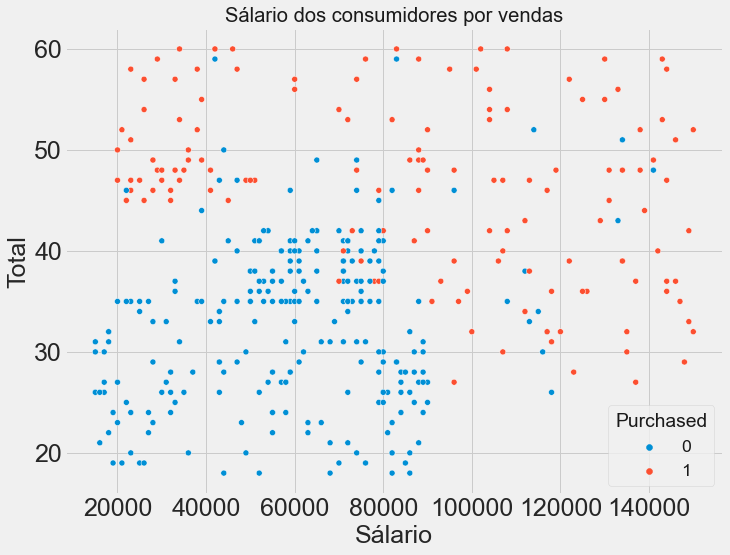

In [66]:
plt.figure(figsize=(10.5, 8))

ax = sns.scatterplot(x="EstimatedSalary", y="Age", data = df, hue="Purchased")
plt.title("Sálario dos consumidores por vendas")
plt.xlabel("Sálario")
plt.ylabel("Total")

# Análise de dados = Univariada

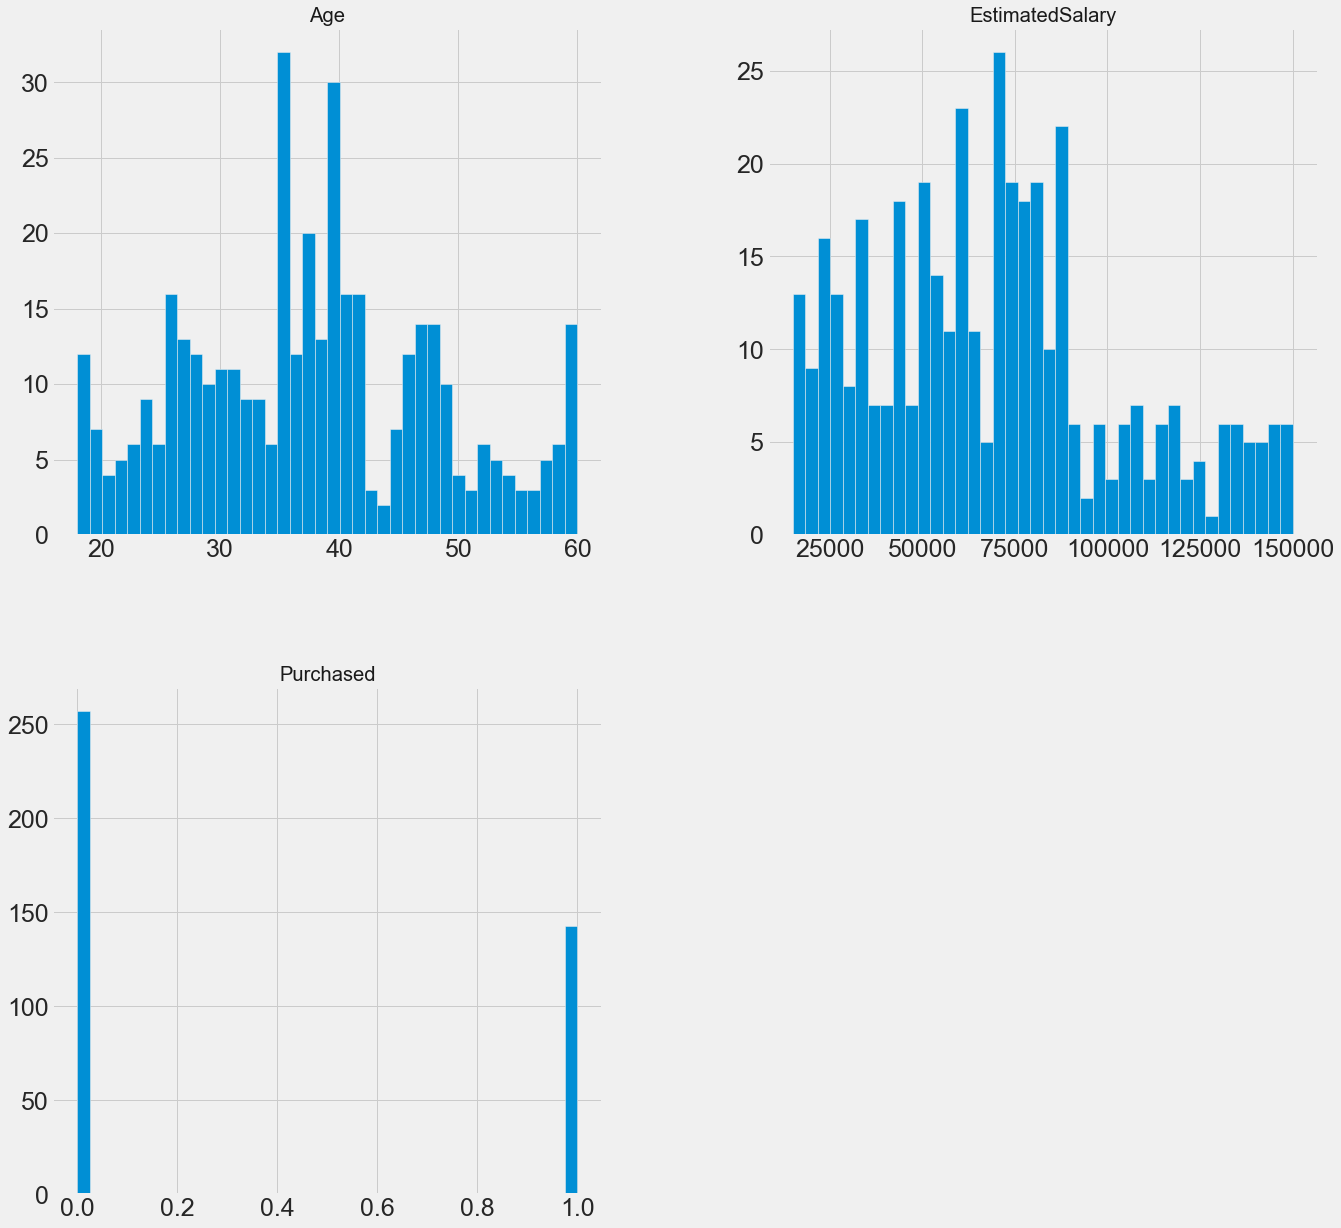

In [68]:
# Fazendo um comparativo dos dados 
df.hist(bins = 40, figsize=(20.2, 20))
plt.title("Gráfico de histrograma")
plt.xlabel("Total")
plt.show()


<AxesSubplot:xlabel='Purchased', ylabel='Count'>

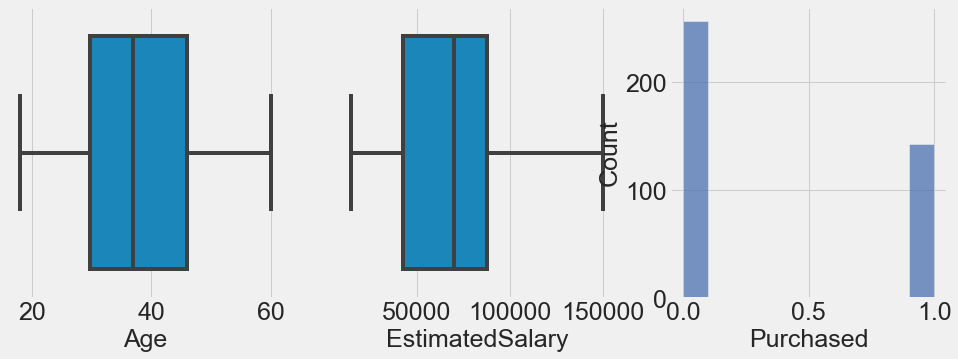

In [69]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

sns.boxplot(x = df["Age"],ax=axis1)
sns.boxplot(x = df["EstimatedSalary"],ax=axis2)
sns.histplot(x = df["Purchased"],ax=axis3)

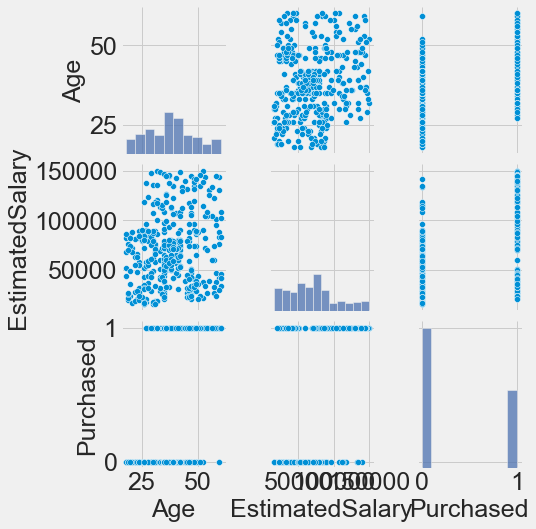

In [70]:
ax = sns.pairplot(df)

# Pré - Processamento

- O processamento de dados começa com os dados em sua forma bruta e os converte em um formato mais legível (gráficos, documentos, etc.), dando-lhes a forma e o contexto necessários para serem interpretados por computadores e utilizados.

- Exemplo: Uma letra, um valor numérico. Quando os dados são vistos dentro de um contexto e transmite algum significado, tornam-se informações.

In [71]:
# Tipos dos dados
df.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [73]:
# Mundando os tipo de dados de object para inteiros 

df['EstimatedSalary'] = df['EstimatedSalary'].astype(int)
df['Purchased'] = df['Purchased'].astype(int)
df.dtypes

Age                int64
EstimatedSalary    int32
Purchased          int32
dtype: object

# 0.8) Feature Engineering

- Praticamente todos os algoritmos de Aprendizado de Máquina possuem entradas e saídas. As entradas são formadas por colunas de dados estruturados, onde cada coluna recebe o nome de feature, também conhecido como variáveis independentes ou atributos. Essas features podem ser palavras, pedaços de informação de uma imagem, etc. Os modelos de aprendizado de máquina utilizam esses recursos para classificar as informações.
Por exemplo, sedentarismo e fator hereditário são variáveis independentes para quando se quer prever se alguém vai ter câncer ou não.



- As saídas, por sua vez, são chamadas de variáveis dependentes ou classe, e essa é a variável que estamos tentando prever. O nosso resultado pode ser 0 e 1 correspondendo a 'Não' e 'Sim' respectivamente, que responde a uma pergunta como: "Fulano é bom pagador?" ou a probabilidade de alguém comprar um produto ou não.

In [74]:
# Importando a biblioteca para pré-processamento 

from sklearn.preprocessing import LabelEncoder

for i in df.columns:
    if df[i].dtype==np.number:
        continue
    df[i]= LabelEncoder().fit_transform(df[i])
    
df.head(4)

,Age,EstimatedSalary,Purchased
0,1,4,0
1,17,5,0
2,8,26,0
3,9,39,0


# Treino e Teste

- Treino e teste da base de dados da coluna price e idade

In [76]:
# Variável para treino
x = df[["EstimatedSalary"]]

# Variável para teste
y = df["Purchased"]

In [77]:
# Total de linhas e colunas dados variável x
x.shape

(400, 1)

In [78]:
# Total de linhas e colunas dados variável y
y.shape

(400,)

# Escalonamento

- Escalonamento uma forma de contornar os problemas relacionados à escala, mantendo a informação estatística dos dados. O procedimento consiste em realizar uma transformação sobre o conjunto original dos dados de modo que cada variável apresente média zero e variância unitária.

In [81]:
# Importando a biblioteca sklearn para o escalonamneto dos dados
from sklearn.preprocessing import StandardScaler

pre_scaler = StandardScaler() # Inicializando o escalonamento
pre_scaler_fit = pre_scaler.fit_transform(x) # Treinamento com a função fit_transform com a variável x
pre_scaler_fit.shape # Imprimindo o valor do escalonamento

(400, 1)

# Modelo treinado para x, y valor

- 20% para os dados de treino
- 80% para teste
- Random state igual a zero

In [82]:
# Importação da biblioteca sklearn para treino e teste do modelo

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, # Variável x
                                                    y, # Variável y
                                                    test_size=0.20, # Divivindo os dados em 20% para treino e 80% para teste
                                                    random_state = 0) # Random state igual a zero

In [83]:
# Total de linhas e colunas e linhas dos dados de treino x
x_train.shape

(320, 1)

In [84]:
# Total de linhas dos dados de treino y
y_train.shape

(320,)

In [85]:
# Total de linhas e colunas dos dados de treino x teste 
x_test.shape

(80, 1)

In [87]:
# Total de linhas e colunas dos dados de treino y teste 
y_test.shape

(80,)

# Modelo machine learning
- Modelo 01 - Naive Bayes

In [88]:
%%time

# Importação da biblioteca sklearn o modelo
from sklearn.naive_bayes import GaussianNB

# Nome do algoritmo M.L
model_naive_bayes = GaussianNB()

# Treinamento do modelo
model_naive_bayes_fit = model_naive_bayes.fit(x_train, y_train)

# Score do modelo
model_naive_bayes_score = model_naive_bayes.score(x_train, y_train)
print("Model - Naive Bayes: %.2f" % (model_naive_bayes_score * 100))

Model - Naive Bayes: 77.50
Wall time: 8.98 ms


In [89]:
# Previsão do modelo
model_naive_bayes_predict = model_naive_bayes.predict(x_test)
model_naive_bayes_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [91]:
# Accuracy do modelo 
from sklearn.metrics import accuracy_score

accuracy_naive = accuracy_score(y_test, model_naive_bayes_predict)
print("Accuracy - Naive Bayes: %.2f" % (accuracy_naive * 100))

Accuracy - Naive Bayes: 82.50


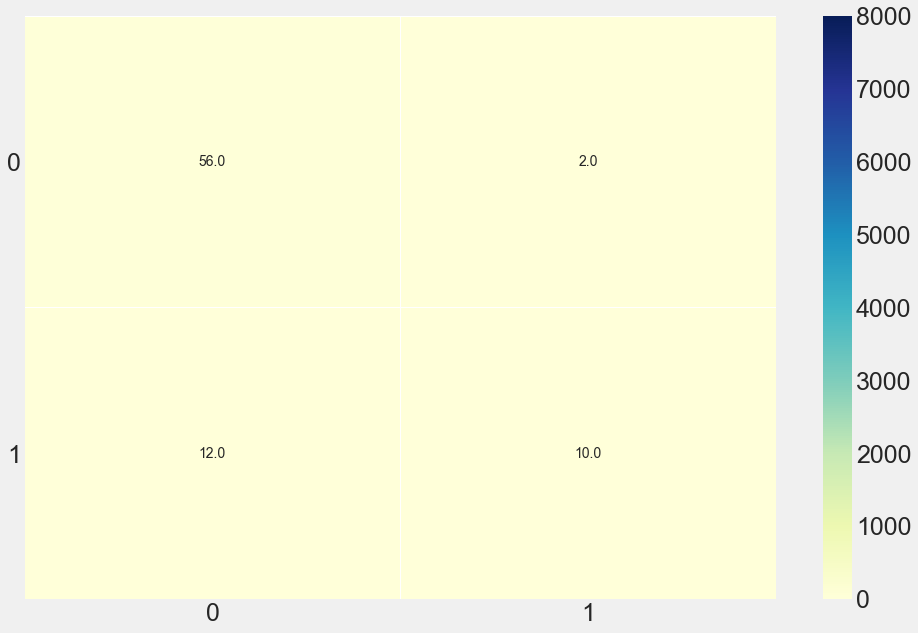

In [106]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

matrix_confusion = confusion_matrix(y_test, model_naive_bayes_predict)

plt.figure(figsize=(15,10))
matrix = sns.heatmap(matrix_confusion, vmin=0, vmax=8000, cmap = "YlGnBu", linewidths=.5, annot=True ,annot_kws={'size':14} ,fmt=".1f")
plt.yticks(rotation=0)
plt.show()

roc_auc 0.7362852664576802


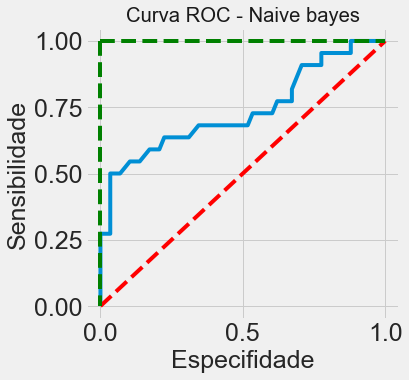

In [107]:
# Curva roc modelo naive bayes
from sklearn.metrics import roc_curve, roc_auc_score

roc = model_naive_bayes.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC - Naive bayes')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

#area > 0.8, entao discriminacao excelente!

In [108]:
# Classificação report do modelo
from sklearn.metrics import classification_report

classification = classification_report(y_test, model_naive_bayes_predict)
print("Modelo 01 - Naive Bayes")
print()
print(classification)

Modelo 01 - Naive Bayes

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        58
           1       0.83      0.45      0.59        22

    accuracy                           0.82        80
   macro avg       0.83      0.71      0.74        80
weighted avg       0.83      0.82      0.81        80



In [109]:
# Métricas do modelo
# Precision
# Recall
# Accuracy
# F1 Score

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision = precision_score(y_test, model_naive_bayes_predict)
Recall = recall_score(y_test, model_naive_bayes_predict)
Accuracy = accuracy_score(y_test, model_naive_bayes_predict)
F1_Score = f1_score(y_test, model_naive_bayes_predict)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
0,precision,0.833333
2,Accuracy,0.825000
3,F1_Score,0.588235
1,Recall,0.454545


# Modelo 02 - Random forest

In [110]:
%%time

# Importação da biblioteca 
from sklearn.ensemble import RandomForestClassifier

# Modelo random forest classifier
model_random_forest = RandomForestClassifier(max_depth = 2, random_state = 0)

# Modelo treinamento 
model_random_forest_fit = model_random_forest.fit(x_train, y_train)

# Modelo score do modelo
model_random_forest_score = model_random_forest.score(x_train, y_train)
print("Score - Modelo random forest: %.2f" % (model_random_forest_score * 100))

Score - Modelo random forest: 78.12
Wall time: 7.54 s


In [111]:
# Previsão do modelo
model_random_forest_pred = model_random_forest.predict(x_test)
model_random_forest_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [112]:
# Accuracy do modelo
accuracy_random_forest = accuracy_score(y_test, model_random_forest_pred)

print("Acurácia - Random forest: %.2f" % (accuracy_random_forest * 100))

Acurácia - Random forest: 83.75


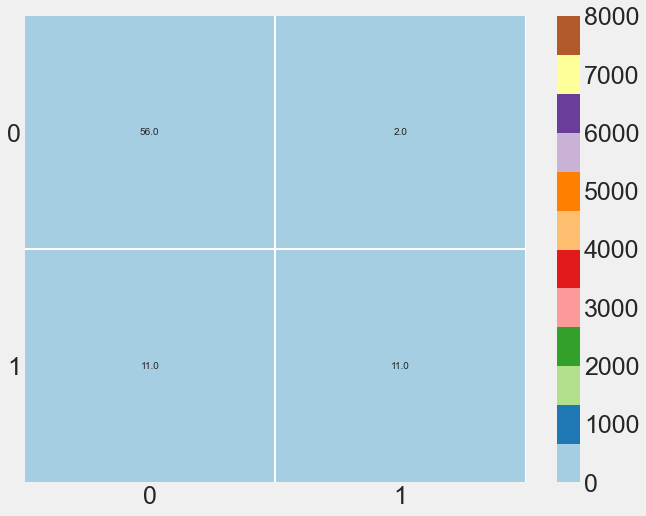

In [118]:
# Confusion matrix 
plt.figure(figsize=(10,8))

matrix_confusion = confusion_matrix(y_test, model_random_forest_pred)
matrix = sns.heatmap(matrix_confusion, vmin=0, vmax=8000, cmap = "Paired", linewidths=.5, annot=True ,annot_kws={'size':10} ,fmt=".1f")
plt.yticks(rotation=0)
plt.show()

roc_auc 0.8217084639498433


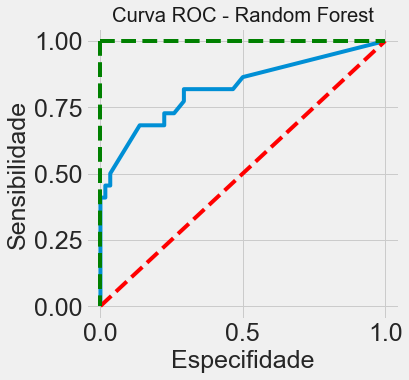

In [119]:
# Curva roc do modelo
roc = model_random_forest.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC - Random Forest')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

# Área > 0.8, entao discriminacao excelente!

In [120]:
# Classificação report do modelo
classification = classification_report(y_test, model_random_forest_pred)

print("Modelo - 02 - Random Forest")
print("\n")
print(classification)

Modelo - 02 - Random Forest


              precision    recall  f1-score   support

           0       0.84      0.97      0.90        58
           1       0.85      0.50      0.63        22

    accuracy                           0.84        80
   macro avg       0.84      0.73      0.76        80
weighted avg       0.84      0.84      0.82        80



In [121]:
# Métricas do modelo
precision = precision_score(y_test, model_random_forest_pred)
Recall = recall_score(y_test, model_random_forest_pred)
Accuracy = accuracy_score(y_test, model_random_forest_pred)
F1_Score = f1_score(y_test, model_random_forest_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
0,precision,0.846154
2,Accuracy,0.837500
3,F1_Score,0.628571
1,Recall,0.500000


# Modelo 03 - Decision Tree

In [122]:
%%time

# Importação da biblioteca 
from sklearn.tree import DecisionTreeClassifier

# Importação do modelo decision tree
modelo_arvore_cla_1 = DecisionTreeClassifier(max_depth = 5, random_state = 0)

# Treinamento do modelo 
modelo_arvore_cla_fit = modelo_arvore_cla_1.fit(x_train, y_train)

# Score do modelo ML
modelo_arvore_scor = modelo_arvore_cla_1.score(x_train, y_train)
print("Modelo - Decision Tree Classifier: %.2f" % (modelo_arvore_scor * 100))

Modelo - Decision Tree Classifier: 80.62
Wall time: 7.98 ms


In [123]:
# Previsão do modelo
modelo_arvore_pred = modelo_arvore_cla_1.predict(x_test)
modelo_arvore_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

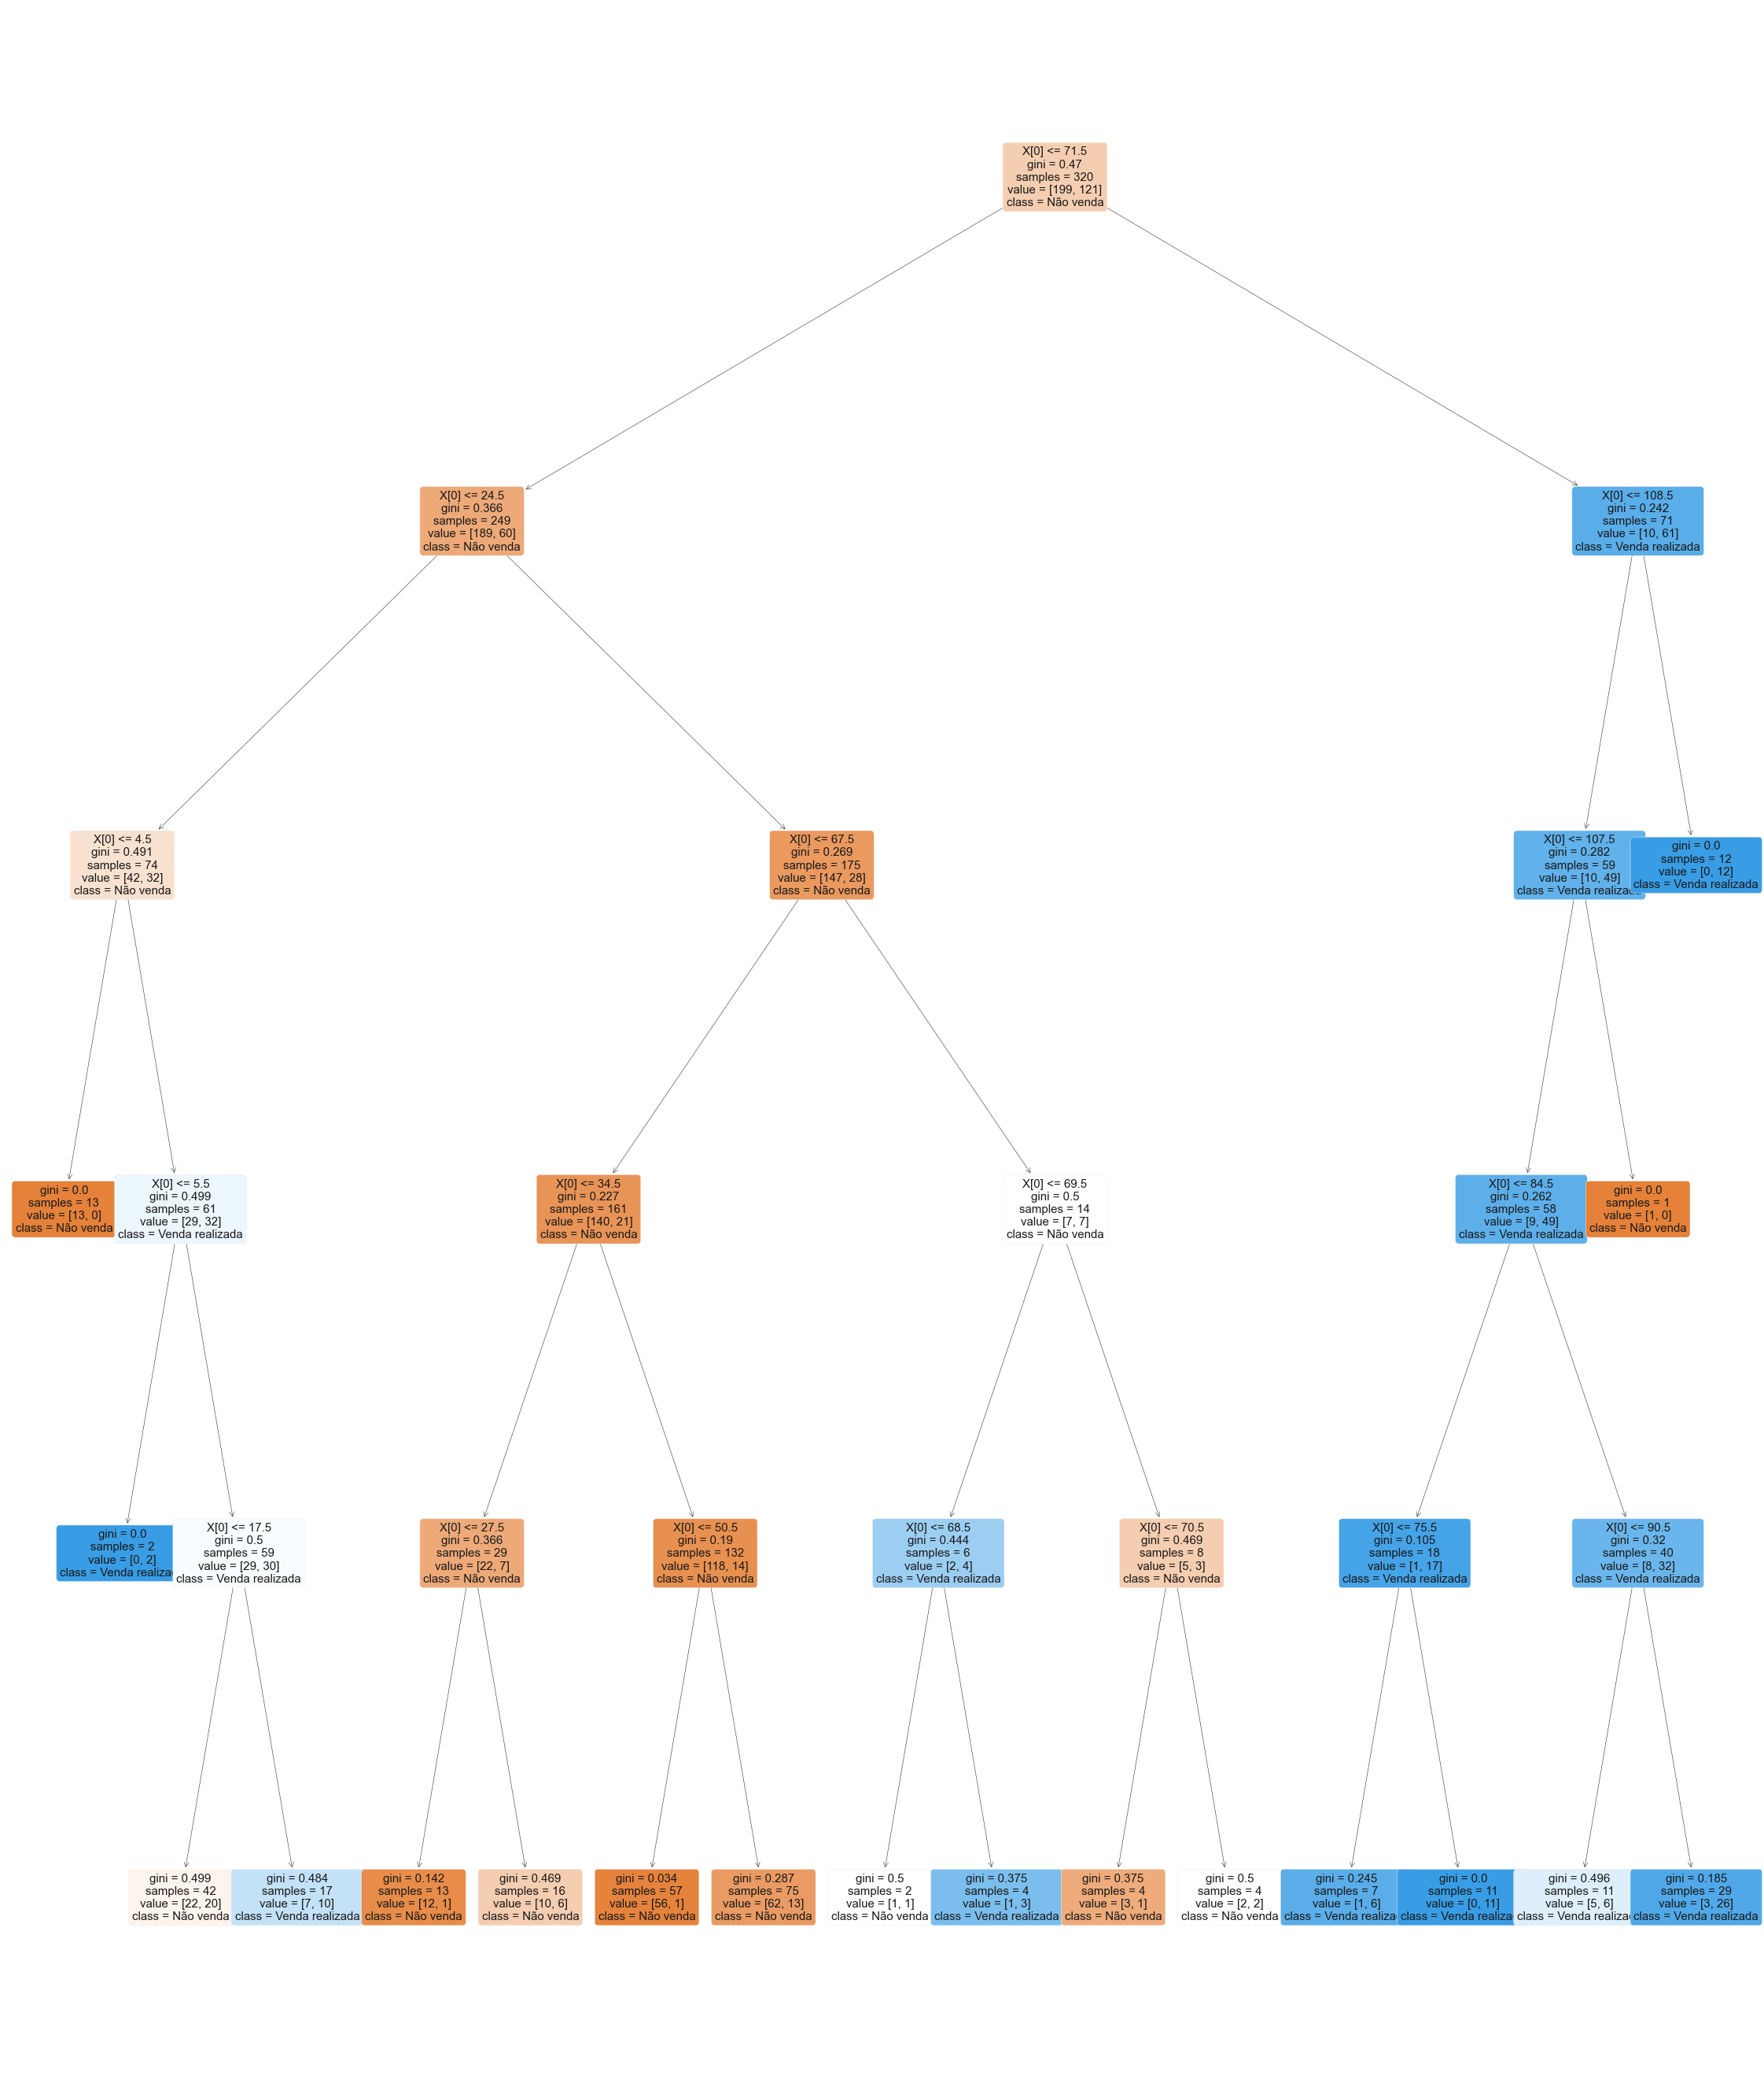

In [126]:
# Gráfico da ávore decisão
from sklearn import tree

fig, ax = plt.subplots(figsize=(35.5, 45), facecolor = "w")
tree.plot_tree(modelo_arvore_cla_1, 
               ax = ax, 
               fontsize = 15, 
               rounded = True, 
               filled = True, 
               class_names = ["Não venda", "Venda realizada"])
plt.show()

In [127]:
# Modelo accuracy score do modelo
acuracia_decision_tree = accuracy_score(y_test, modelo_arvore_pred)
print("Acuracia - Decision Tree: %.2f" % (acuracia_decision_tree * 100))

Acuracia - Decision Tree: 77.50


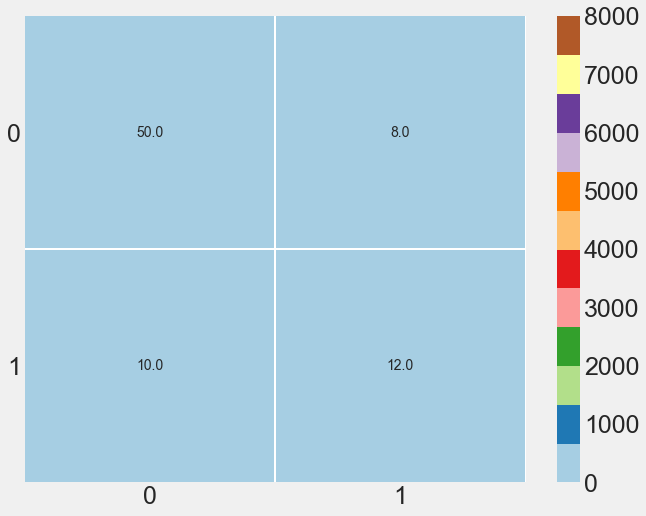

In [131]:
# Confusion matrix do modelo
matrix_confusion = confusion_matrix(y_test, modelo_arvore_pred)

plt.figure(figsize=(10,8))
sns.heatmap(matrix_confusion, vmin=0, vmax=8000, cmap = "Paired", linewidths=.5, annot=True ,annot_kws={'size':14} ,fmt=".1f")
plt.yticks(rotation=0)
plt.show()

roc_auc 0.7394200626959249


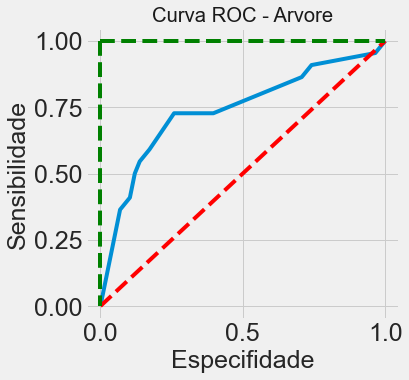

In [132]:
# Curva roc do modelo
roc = modelo_arvore_cla_1.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC - Arvore')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

# Área > 0.8, entao discriminacao excelente!

In [133]:
# Classification report do modelo
class_report = classification_report(y_test, modelo_arvore_pred)
print("Modelo 03 - Decision Tree")
print("\n")
print(class_report)

Modelo 03 - Decision Tree


              precision    recall  f1-score   support

           0       0.83      0.86      0.85        58
           1       0.60      0.55      0.57        22

    accuracy                           0.78        80
   macro avg       0.72      0.70      0.71        80
weighted avg       0.77      0.78      0.77        80



In [134]:
# Métricas do modelo
precision = precision_score(y_test, modelo_arvore_pred)
Recall = recall_score(y_test, modelo_arvore_pred)
Accuracy = accuracy_score(y_test, modelo_arvore_pred)
F1_Score = f1_score(y_test, modelo_arvore_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
2,Accuracy,0.775000
0,precision,0.600000
3,F1_Score,0.571429
1,Recall,0.545455


# Modelo 04 - Regressão logística

In [135]:
%%time

# Importação da biblioteca 
from sklearn.linear_model import LogisticRegression

# Nome do modelo
model_regression_logistic = LogisticRegression()

# Treinamento do modelo ML
model_regression_logistic_fit = model_regression_logistic.fit(x_train, y_train)

# Score do modelo
model_regression_logistic_score = model_regression_logistic.score(x_train, y_train)
print("Modelo 04 - Regressão logística: %.2f" % (model_random_forest_score * 100))

Modelo 04 - Regressão logística: 78.12
Wall time: 20.9 ms


In [136]:
# Previsão do modelo
model_regression_logistic_pred = model_regression_logistic.predict(x_test)
model_regression_logistic_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [137]:
# Accuracy score do modelo
accuracy_regression_logistic = accuracy_score(y_test, model_regression_logistic_pred)

print("Accuracy - Regressão logistica: %.2f" % (accuracy_regression_logistic * 100))

Accuracy - Regressão logistica: 82.50


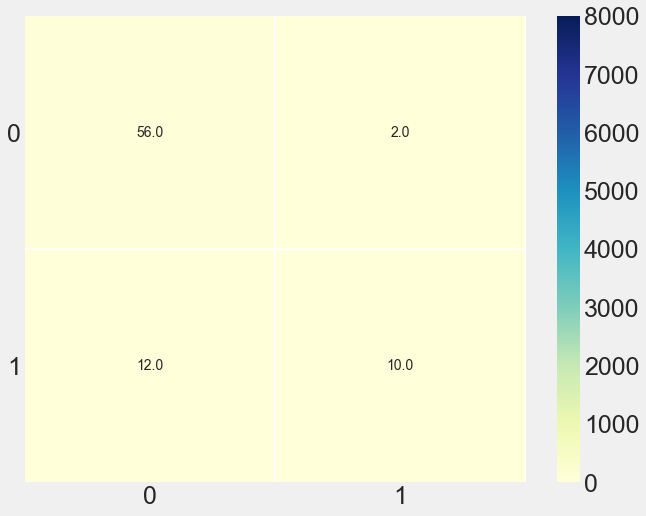

In [139]:
# Matrix confusion
matrix_confusion = confusion_matrix(y_test, model_regression_logistic_pred)

plt.figure(figsize=(10,8))
matrix = sns.heatmap(matrix_confusion, vmin=0, vmax=8000, cmap = "YlGnBu", linewidths=.5, annot=True ,annot_kws={'size':14} ,fmt=".1f")
plt.yticks(rotation=0)
plt.show()

roc_auc 0.7049373040752351


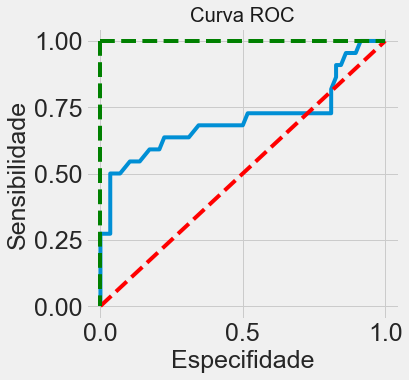

In [140]:
# Curva roc do modelo
roc = model_regression_logistic.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

#area > 0.8, entao discriminacao excelente!

In [141]:
# Classification report
classification = classification_report(y_test, model_regression_logistic_pred)
print("Modelo 04 - Regressão logistica")
print()
print(classification)

Modelo 04 - Regressão logistica

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        58
           1       0.83      0.45      0.59        22

    accuracy                           0.82        80
   macro avg       0.83      0.71      0.74        80
weighted avg       0.83      0.82      0.81        80



In [142]:
# Métricas do modelo 
precision = precision_score(y_test, model_regression_logistic_pred)
Recall = recall_score(y_test, model_regression_logistic_pred)
Accuracy = accuracy_score(y_test, model_regression_logistic_pred)
F1_Score = f1_score(y_test, model_regression_logistic_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
0,precision,0.833333
2,Accuracy,0.825000
3,F1_Score,0.588235
1,Recall,0.454545


# Modelo 05 - K-NN

In [143]:
%%time

# Importando biblioteca 
from sklearn.neighbors import KNeighborsClassifier

# Nome do algoritmo M.L
model_knn = KNeighborsClassifier(n_neighbors = 10)

# Treinamento do modelo
model_knn_fit = model_knn.fit(x_train, y_train)

# Score do modelo
model_knn_score = model_knn.score(x_train, y_train)
print("Modelo - K-NN: %.2f" % (model_knn_score * 100))

Modelo - K-NN: 79.38
Wall time: 23.9 ms


In [144]:
# Previsão do modelo
model_knn_pred = model_knn.predict(x_test)
model_knn_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [145]:
# Accuracy score
accuracy_knn = accuracy_score(y_test, model_knn_pred)
print("Acurácia - K-NN: %.2f" % (accuracy_knn * 100))

Acurácia - K-NN: 83.75


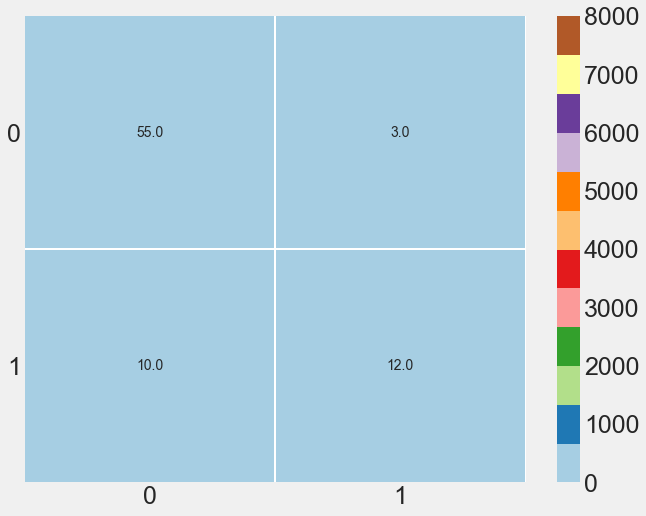

In [147]:
# Matrix confusion do modelo
matrix_confusion = confusion_matrix(y_test, model_knn_pred)

plt.figure(figsize=(10,8))
matrix = sns.heatmap(matrix_confusion, vmin=0, vmax=8000, cmap = "Paired", linewidths=.5, annot=True ,annot_kws={'size':14} ,fmt=".1f")
plt.yticks(rotation=0)
plt.show()

roc_auc 0.8346394984326019


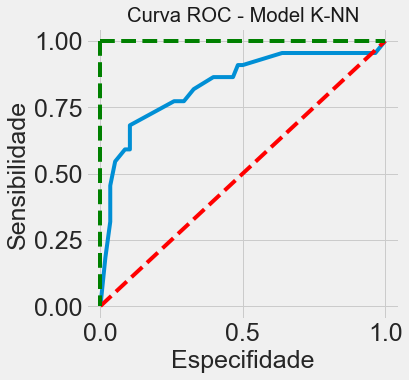

In [149]:
# Curva roc do modelo
roc = model_knn.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC - Model K-NN')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

# Área > 0.8, entao discriminacao excelente!

In [150]:
# Classification report

classification = classification_report(y_test, model_knn_pred)
print("Modelo 05 - K-NN")
print()
print(classification)

Modelo 05 - K-NN

              precision    recall  f1-score   support

           0       0.85      0.95      0.89        58
           1       0.80      0.55      0.65        22

    accuracy                           0.84        80
   macro avg       0.82      0.75      0.77        80
weighted avg       0.83      0.84      0.83        80



In [151]:
# Métricas do modelo

precision = precision_score(y_test, model_knn_pred)
Recall = recall_score(y_test, model_knn_pred)
Accuracy = accuracy_score(y_test, model_knn_pred)
F1_Score = f1_score(y_test, model_knn_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
2,Accuracy,0.837500
0,precision,0.800000
3,F1_Score,0.648649
1,Recall,0.545455


In [152]:
# Resultados - Modelos machine learning

modelos = pd.DataFrame({
    
    "Modelos" :["Regressão logistica", 
                "K-NN", "Random Forest", 
                "Decision Tree",
                "Naive Bayes"],

    "Acurácia" :      [accuracy_naive, 
                      accuracy_random_forest, 
                      acuracia_decision_tree, 
                      accuracy_regression_logistic,
                      accuracy_knn]})

modelos.sort_values(by = "Acurácia", ascending = False)

,Modelos,Acurácia
1,K-NN,0.8375
4,Naive Bayes,0.8375
0,Regressão logistica,0.8250
3,Decision Tree,0.8250
2,Random Forest,0.7750


Text(0, 0.5, 'Acurácia do modelo')

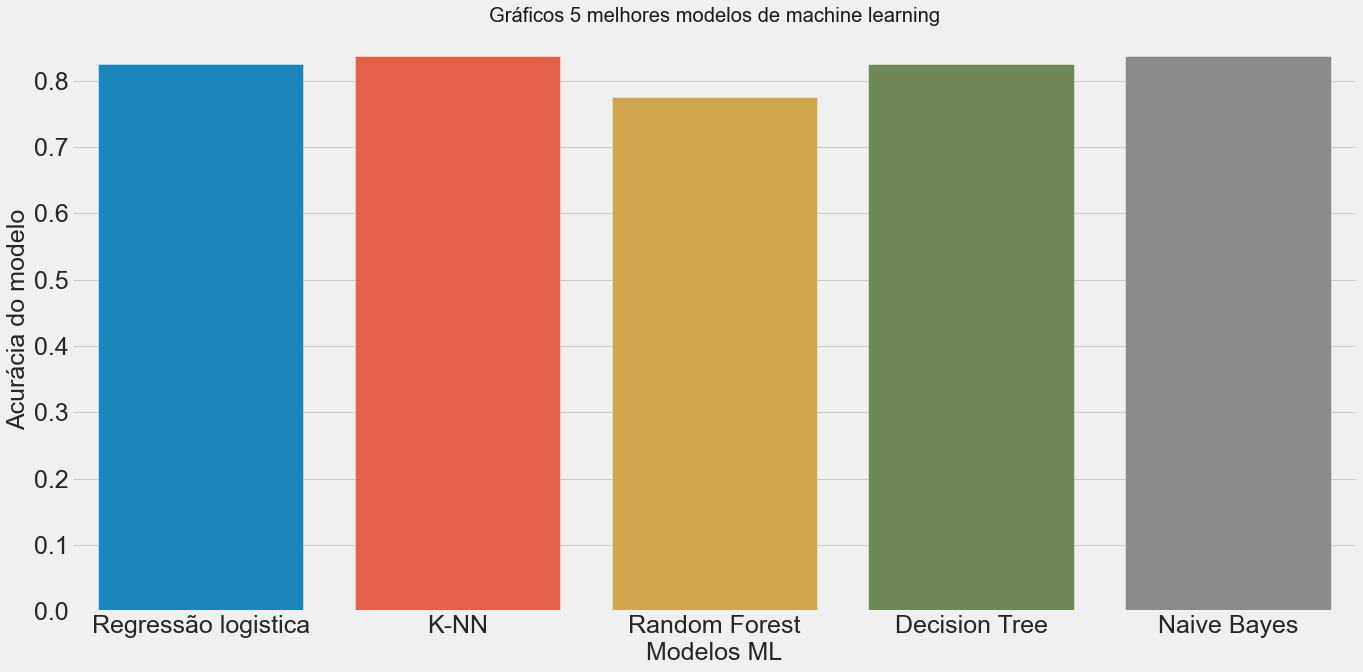

In [158]:
plt.figure(figsize=(20.5, 10))

plt.title("Gráficos 5 melhores modelos de machine learning")
sns.barplot(x='Modelos', y='Acurácia', data=modelos)
plt.xlabel("Modelos ML")
plt.ylabel("Acurácia do modelo")

# Salvando modelo machine learning

In [159]:
# Salvando modelo


import pickle
    
with open('model_naive_bayes_predict.pkl', 'wb') as file:
    pickle.dump(model_naive_bayes, file)

with open('model_random_forest_pred.pkl', 'wb') as file:
    pickle.dump(model_random_forest, file)

with open('modelo_arvore_pred.pkl', 'wb') as file:
    pickle.dump(modelo_arvore_pred, file)

with open('model_regression_logistic_pred.pkl', 'wb') as file:
    pickle.dump(model_regression_logistic, file)

with open('model_knn_pred.pkl', 'wb') as file:
    pickle.dump(model_knn, file)